In [2]:
# Import dependencies
import pandas as pd
import numpy as np
from pathlib import Path

In [3]:
# Import our input dataset
file_path = Path('./Resources/vgsales-12-4-2019.csv')
vgsales_df = pd.read_csv(file_path)
vgsales_df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [4]:
vgsales_df.columns.tolist()

['Rank',
 'Name',
 'basename',
 'Genre',
 'ESRB_Rating',
 'Platform',
 'Publisher',
 'Developer',
 'VGChartz_Score',
 'Critic_Score',
 'User_Score',
 'Total_Shipped',
 'Global_Sales',
 'NA_Sales',
 'PAL_Sales',
 'JP_Sales',
 'Other_Sales',
 'Year',
 'Last_Update',
 'url',
 'status',
 'Vgchartzscore',
 'img_url']

In [5]:
vgsales_df.dtypes

Rank                int64
Name               object
basename           object
Genre              object
ESRB_Rating        object
Platform           object
Publisher          object
Developer          object
VGChartz_Score    float64
Critic_Score      float64
User_Score        float64
Total_Shipped     float64
Global_Sales      float64
NA_Sales          float64
PAL_Sales         float64
JP_Sales          float64
Other_Sales       float64
Year              float64
Last_Update        object
url                object
status              int64
Vgchartzscore     float64
img_url            object
dtype: object

In [6]:
vgsales_df.count()

Rank              55792
Name              55792
basename          55792
Genre             55792
ESRB_Rating       23623
Platform          55792
Publisher         55792
Developer         55775
VGChartz_Score        0
Critic_Score       6536
User_Score          335
Total_Shipped      1827
Global_Sales      19415
NA_Sales          12964
PAL_Sales         13189
JP_Sales           7043
Other_Sales       15522
Year              54813
Last_Update        9186
url               55792
status            55792
Vgchartzscore       799
img_url           55792
dtype: int64

In [7]:
# Drop columns:
# Rank: just numbers in order, not real ranking
# status: only one status 1, not sure what is that
# Last_Update: unneccessary
# VGChartz_Score: no values
vg_global_sales_df = vgsales_df.drop(['Rank', 'Last_Update', 
                                   'status', 'VGChartz_Score','Vgchartzscore',
                                   'Critic_Score', 'User_Score', 'Total_Shipped',
                                  'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'url', 'img_url', 'basename'], axis = 1)
vg_global_sales_df.head(5)

,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Global_Sales,Year
0,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,2006.0
1,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,1985.0
2,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,2008.0
3,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,2017.0
4,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,2009.0


In [8]:
vg_global_sales_df.count()

Name            55792
Genre           55792
ESRB_Rating     23623
Platform        55792
Publisher       55792
Developer       55775
Global_Sales    19415
Year            54813
dtype: int64

In [9]:
# Find null value
for column in vg_global_sales_df.columns:
    print(f'Column {column} has {vg_global_sales_df[column].isnull().sum()} null values')

Column Name has 0 null values
Column Genre has 0 null values
Column ESRB_Rating has 32169 null values
Column Platform has 0 null values
Column Publisher has 0 null values
Column Developer has 17 null values
Column Global_Sales has 36377 null values
Column Year has 979 null values


In [10]:
vg_global_sales_df = vg_global_sales_df.dropna()

In [11]:
# Find null value
for column in vg_global_sales_df.columns:
    print(f'Column {column} has {vg_global_sales_df[column].isnull().sum()} null values')

Column Name has 0 null values
Column Genre has 0 null values
Column ESRB_Rating has 0 null values
Column Platform has 0 null values
Column Publisher has 0 null values
Column Developer has 0 null values
Column Global_Sales has 0 null values
Column Year has 0 null values


In [12]:
vg_global_sales_df.head()

,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Global_Sales,Year
19,Grand Theft Auto V,Action,M,PS3,Rockstar Games,Rockstar North,20.32,2013.0
20,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Rockstar North,19.39,2014.0
30,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,Rockstar North,16.15,2002.0
32,Grand Theft Auto V,Action,M,X360,Rockstar Games,Rockstar North,15.86,2013.0
34,Call of Duty: Black Ops 3,Shooter,M,PS4,Activision,Treyarch,15.09,2015.0


In [13]:
vg_global_sales_df.shape

(13790, 8)

In [14]:
# Filter and only use data since 2000
vg_global_sales_df = vg_global_sales_df[vg_global_sales_df['Year'] >= 2000]
vg_global_sales_df.shape

(12801, 8)

In [15]:
# Calculate total Global_Sales
vg_total_global_sales = vg_global_sales_df['Global_Sales'].sum()
print(vg_total_global_sales)

5744.660000000001


# Analyze global sales by Publisher, Developer, Game, Genre

#### The core difference between video game developers and publishers is: that developers are responsible for creating the video game while publishers are responsible for marketing, sales, and PR of it.

## Global Sales by Publisher

In [16]:
# Count distinct values of Publisher
vg_global_sales_df['Publisher'].nunique()

375

In [17]:
# Group Publisher and sum
vg_global_sales_by_Publisher_df = vg_global_sales_df.groupby('Publisher')[['Global_Sales']].sum()
vg_global_sales_by_Publisher_df.head()

,Global_Sales
Publisher,
10TACLE Studios,0.45
14 Degrees East,0.00
1C Company,0.07
2K Games,51.10
2K Play,13.23


In [18]:
# % of global_sales
vg_global_sales_by_Publisher_df ["Percentage of Global_Sales"] = vg_global_sales_by_Publisher_df['Global_Sales'] / vg_total_global_sales
vg_global_sales_by_Publisher_df.head()

,Global_Sales,Percentage of Global_Sales
Publisher,,
10TACLE Studios,0.45,0.000078
14 Degrees East,0.00,0.000000
1C Company,0.07,0.000012
2K Games,51.10,0.008895
2K Play,13.23,0.002303


In [19]:
vg_global_sales_by_Publisher_df.columns

Index(['Global_Sales', 'Percentage of Global_Sales'], dtype='object')

In [20]:
vg_global_sales_by_top10_Publisher_df = vg_global_sales_by_Publisher_df.nlargest(10,'Global_Sales')
vg_global_sales_by_top10_Publisher_df['Percentage of Global_Sales'] = pd.Series(["{0:.2f}%".format(val * 100) 
                                for val in vg_global_sales_by_top10_Publisher_df['Percentage of Global_Sales']],
                                index = vg_global_sales_by_top10_Publisher_df.index)

vg_global_sales_by_top10_Publisher_df

,Global_Sales,Percentage of Global_Sales
Publisher,,
Activision,679.88,11.83%
Electronic Arts,612.15,10.66%
Ubisoft,449.04,7.82%
EA Sports,444.30,7.73%
THQ,306.66,5.34%
Sony Computer Entertainment,300.04,5.22%
Rockstar Games,236.26,4.11%
Konami,172.07,3.00%
Sega,156.20,2.72%


In [21]:
vg_global_sales_by_top10_Publisher_df.columns

Index(['Global_Sales', 'Percentage of Global_Sales'], dtype='object')

In [22]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt

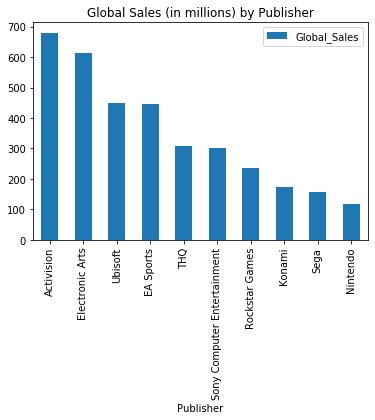

In [32]:
# Build bar chart
vg_global_sales_by_top10_Publisher_df.plot( y='Global_Sales', kind = 'bar', title = "Global Sales (in millions) by Publisher")

## Global Sales by Developer

In [24]:
# Count distinct values of Developer
vg_global_sales_df['Developer'].nunique()

2138

In [25]:
# Group Developer and sum
vg_global_sales_by_Developer_df = vg_global_sales_df.groupby('Developer')[['Global_Sales']].sum()
vg_global_sales_by_Developer_df.head()

,Global_Sales
Developer,
10tacle Studios AG,0.16
1C Company,0.00
1C Company / Avalon Style,0.00
1C Maddox Games,0.01
1C: Maddox Games,0.11


In [26]:
# % of global_sales
vg_global_sales_by_Developer_df ["Percentage of Global_Sales"] = vg_global_sales_by_Developer_df['Global_Sales'] / vg_total_global_sales
vg_global_sales_by_top10_Developer_df = vg_global_sales_by_Developer_df.nlargest(10,'Global_Sales')
vg_global_sales_by_top10_Developer_df['Percentage of Global_Sales'] = pd.Series(["{0:.2f}%".format(val * 100) 
                                for val in vg_global_sales_by_top10_Developer_df['Percentage of Global_Sales']],
                                index = vg_global_sales_by_top10_Developer_df.index)

vg_global_sales_by_top10_Developer_df

,Global_Sales,Percentage of Global_Sales
Developer,,
EA Canada,255.50,4.45%
EA Tiburon,172.41,3.00%
Ubisoft Montreal,164.38,2.86%
Treyarch,146.96,2.56%
Traveller's Tales,140.09,2.44%
Infinity Ward,118.97,2.07%
Rockstar North,116.91,2.04%
Visual Concepts,94.06,1.64%
Capcom,71.14,1.24%


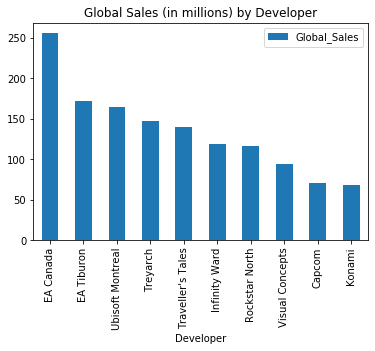

In [33]:
# Build bar chart
vg_global_sales_by_top10_Developer_df.plot( y='Global_Sales', kind = 'bar', title = "Global Sales (in millions) by Developer")

## Global Sales by Genre

In [28]:
# Count distinct values of Genre
vg_global_sales_df['Genre'].nunique()

20

In [29]:
# Group Genre and sum
vg_global_sales_by_Genre_df = vg_global_sales_df.groupby('Genre')[['Global_Sales']].sum()
vg_global_sales_by_Genre_df.head()

,Global_Sales
Genre,
Action,1049.60
Action-Adventure,152.95
Adventure,272.66
Board Game,0.30
Education,0.09


In [30]:
# % of global_sales
vg_global_sales_by_Genre_df ["Percentage of Global_Sales"] = vg_global_sales_by_Genre_df['Global_Sales'] / vg_total_global_sales
vg_global_sales_by_top10_Genre_df = vg_global_sales_by_Genre_df.nlargest(10,'Global_Sales')
vg_global_sales_by_top10_Genre_df['Percentage of Global_Sales'] = pd.Series(["{0:.2f}%".format(val * 100) 
                                for val in vg_global_sales_by_top10_Genre_df['Percentage of Global_Sales']],
                                index = vg_global_sales_by_top10_Genre_df.index)

vg_global_sales_by_top10_Genre_df

,Global_Sales,Percentage of Global_Sales
Genre,,
Action,1049.60,18.27%
Sports,1007.56,17.54%
Shooter,930.61,16.20%
Racing,446.70,7.78%
Misc,434.75,7.57%
Role-Playing,395.08,6.88%
Platform,311.49,5.42%
Adventure,272.66,4.75%
Simulation,261.44,4.55%


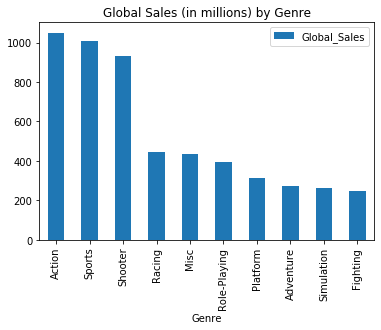

In [34]:
# Build bar chart
vg_global_sales_by_top10_Genre_df.plot( y='Global_Sales', kind = 'bar', title = "Global Sales (in millions) by Genre")

# Top 10 Games with highest Global Sales

In [35]:
# Group Genre and sum
vg_global_sales_by_Game_df = vg_global_sales_df.groupby('Name')[['Global_Sales']].sum()
vg_global_sales_by_Game_df.head()

,Global_Sales
Name,
.hack//G.U. Last Recode,0.24
.hack//G.U. Vol.1//Rebirth,0.17
.hack//G.U. Vol.2//Reminisce,0.23
.hack//G.U. Vol.2//Reminisce (jp sales),0.16
.hack//G.U. Vol.3//Redemption,0.17


In [36]:
# % of global_sales
vg_global_sales_by_Game_df ["Percentage of Global_Sales"] = vg_global_sales_by_Game_df['Global_Sales'] / vg_total_global_sales
vg_global_sales_by_top10_Game_df = vg_global_sales_by_Game_df.nlargest(10,'Global_Sales')
vg_global_sales_by_top10_Game_df['Percentage of Global_Sales'] = pd.Series(["{0:.2f}%".format(val * 100) 
                                for val in vg_global_sales_by_top10_Game_df['Percentage of Global_Sales']],
                                index = vg_global_sales_by_top10_Game_df.index)

vg_global_sales_by_top10_Game_df

,Global_Sales,Percentage of Global_Sales
Name,,
Grand Theft Auto V,64.29,1.12%
Call of Duty: Black Ops,30.99,0.54%
Call of Duty: Modern Warfare 3,30.71,0.53%
Call of Duty: Black Ops II,29.59,0.52%
Call of Duty: Ghosts,28.80,0.50%
Call of Duty: Black Ops 3,26.72,0.47%
Call of Duty: Modern Warfare 2,25.02,0.44%
Minecraft,24.01,0.42%
Grand Theft Auto IV,22.53,0.39%


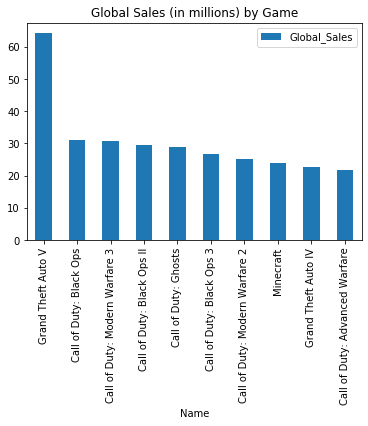

In [37]:
# Build bar chart
vg_global_sales_by_top10_Game_df.plot( y='Global_Sales', kind = 'bar', title = "Global Sales (in millions) by Game")